In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
import pandas as pd

In [2]:
# Definizione di SMARTS per i monosaccaridi (glucosio come esempio)
# Definire SMARTS per Zuccheri generici
SugarSmarts = [
    '[CX4H1][CX4H1][CX4H1](O)[CX4H1](O)[CX4H1](O)',  # Struttura generica di un monosaccaride
    '[CX4H2][CX4H][CX4H](O)[CX4H](O)[CX4H](O)O[CX4H2][CX4H][CX4H](O)[CX4H](O)[CX4H](O) ',  # Struttura generica di un disaccaride
    '[CX4H2][CX4H][CX4H](O)[CX4H](O)[CX4H](O)O[CX4H2][CX4H][CX4H](O)[CX4H](O)[CX4H](O)O[CX4H2][CX4H][CX4H](O)[CX4H](O)[CX4H](O)',               # Struttura generica di un trisaccaride
    '[CX4H2][CX4H][CX4H](O)[CX4H](O)[CX4H](O)O[CX4H2][CX4H][CX4H](O)[CX4H](O)[CX4H](O)O[CX4H2][CX4H][CX4H](O)[CX4H](O)[CX4H](O)O[CX4H2][CX4H][CX4H](O)[CX4H](O)[CX4H](O)',        # Struttura generica di un tetrasaccaride

    # Aggiungere altre varianti se necessario
]

Sugars = [Chem.MolFromSmarts(smarts) for smarts in SugarSmarts]


# Definire SMARTS per Zuccheri generici
#SugarSmarts = Chem.MolFromSmarts('[CX4H2][CX4H][CX4H](O)[CX4H](O)[CX4H](O)')  # Rappresentazione generica di un monosaccaride


# Esempio di calcolo
smiles = "C(C1C(C(C(C(O1)O)O)O)O)O"
mol = Chem.MolFromSmiles(smiles)
img = Draw.MolToImage(mol)
matches = mol.GetSubstructMatches(Sugars[0])
if len(matches) > 0:
    print("Matched with mono saccharide")
else:
    matches = mol.GetSubstructMatches(Sugars[2])
    if len(matches) > 0:
        print("Matched with tri saccharide")
    else:
        matches = mol.GetSubstructMatches(Sugars[3])
        if len(matches) > 0:
            print("Matched with tetra saccharide")
        else:
            print("No saccharide match found")
#img.show()

# Esempio di calcolo
smiles = "C(C1C(C(C(C(O1)O)O)O)O)O"
mol = Chem.MolFromSmiles(smiles)
img = Draw.MolToImage(mol)
num_glucose_groups = count_glucose_groups(mol)
print(f"Numero di gruppi zuccherini: {num_glucose_groups}")
#img.show()

Matched with mono saccharide


NameError: name 'count_glucose_groups' is not defined

# NON FUNZIONA ANCORAAAAAAAAAAAAAAAAAAAAAA

SMARTS: [#6](:,-[#6]:,-[#6]:,-[#6]-[#6]-[#8]-[#6]-[#6](-[#6](-[#6]-[#8])-[#8])-[#8]):,-[#6]:,-[#6]


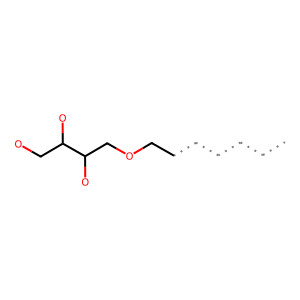

In [21]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdFMCS
from IPython.display import display

# Define test cases
test_cases = [
    "C1OC(CO)C(O)C(O)C1OCC2OC(CO)C(O)C(O)C2O",  # Lattosio
    "C1=CC=C(C=C1)COC2C(C(C(C(O2)CO)O)O)O",  # Salicin
    "C1=CC2=C(C(=O)OC=C2COC3C(C(C(C(O3)CO)O)O)O)C=C1",  # Esculin
    "C1=CC(=CC=C1COC2C(C(C(C(O2)CO)O)O)O)O",  # Arbutin
    "CC1CCC2(C1(CCC3C2CC(C4C3(CCC(C4(C(=O)O)O)O)C(C5C(C(C(C(O5)CO)O)O)O)O)O)C)C(=O)O"  # Additional test case with 4 sugar groups
]

# Convert SMILES to RDKit Mol objects
molecules = [Chem.MolFromSmiles(smiles) for smiles in test_cases]

# Set up MCS parameters to preserve ring structures more strictly
mcs_params = rdFMCS.MCSParameters()
mcs_params.AtomCompare = rdFMCS.AtomCompare.CompareElements
mcs_params.BondCompare = rdFMCS.BondCompare.CompareOrder
mcs_params.RingMatchesRingOnly = True
mcs_params.Threshold = 1.0

# Find the Maximum Common Substructure (MCS)
mcs_result = rdFMCS.FindMCS(molecules, parameters=mcs_params)
mcs_smarts = mcs_result.smartsString
mcs_mol = Chem.MolFromSmarts(mcs_smarts)

# Draw and display the MCS
img = Draw.MolToImage(mcs_mol)
smiles = Chem.MolToSmiles(mcs_mol)
print(f"SMARTS: {mcs_smarts}")
display(img)


In [61]:
from rdkit import Chem

# Definire le rappresentazioni SMARTS per identificare i gruppi zucchero in forma ciclica
GlucoseSmarts = Chem.MolFromSmarts(' C([C@@H]1[C@H]([C@@H]([C@H]([C@H](O1)O)O)O)O)O')  # Ciclo di glucosio
lactose = Chem.MolFromSmiles("C([C@@H]1[C@@H]([C@@H]([C@H]([C@@H](O1)O[C@@H]2[C@H](O[C@H]([C@@H]([C@H]2O)O)O)CO)O)O)O)O")
monosaccharides_smarts = {
    "alfa-glucose": "C([C@@H]1[C@H]([C@@H]([C@H]([C@H](O1)O)O)O)O)O",
    "fructose": "O[C@H]1[C@H](O)[C@H](O[C@]1(O)CO)CO",
    "ribose": "C(C(C(C(C=O)O)O)O)",
    "ribulosio": "C(C(C(C(=O)CO)O)O)O",
    "griceraldeide": "O=CC(CO)O",
    "Diidrossiacetone ": "O=C(CO)CO",
          
}

# img = Draw.MolToImage(lactose)
# print("Lattosio")
# display(img)
def count_glucose_groups(smiles):
    found = 0
    try:
        molecule = Chem.MolFromSmiles(smiles)
        if molecule is None:
            raise ValueError("Invalid SMILES string provided.")
        
        glucose_matches = molecule.GetSubstructMatches(GlucoseSmarts)
        lactose_matches = molecule.GetSubstructMatches(lactose)
        for key, value in monosaccharides_smarts.items():
            monosaccharide = Chem.MolFromSmiles(value)
            matches = molecule.GetSubstructMatches(monosaccharide)
            found += len(matches)
        if found > 0:
            return ("Monosaccaride", found)
        return ("Lactose", len(lactose_matches)) if len(lactose_matches) > 0 else ("Glucose", len(glucose_matches))
    except Exception as e:
        return str(e), 0

# Definizione dei test
test_cases = [
    ("C([C@@H]1[C@@H]([C@@H]([C@H]([C@@H](O1)O[C@@H]2[C@H](O[C@H]([C@@H]([C@H]2O)O)O)CO)O)O)O)O", 2),  # Lattosio
    ("C1=CC=C(C=C1)COC2C(C(C(C(O2)CO)O)O)O", 1),  # Salicin
    ("C1=CC2=C(C(=O)OC=C2COC3C(C(C(C(O3)CO)O)O)O)C=C1", 1),  # Esculin
    ("C1=CC(=CC=C1COC2C(C(C(C(O2)CO)O)O)O)O", 1),  # Arbutin
    ("O([C@H]1[C@H](O)[C@@H](O)C(O)O[C@@H]1CO)[C@H]2O[C@@H]([C@@H](O)[C@H](O)[C@H]2O)CO", 2),  # Maltose
    ("CC1CCC2(C1(CCC3C2CC(C4C3(CCC(C4(C(=O)O)O)O)C(C5C(C(C(C(O5)CO)O)O)O)O)O)C)C(=O)O", 4),  # Additional test case with 4 sugar groups
    ("CC(=O)N[C@@H]1[C@H]([C@@H]([C@H](O[C@H]1O[C@H]2[C@H]([C@H](O[C@H]([C@@H]2O)O[C@@H]3[C@H](OC([C@@H]([C@H]3O)O)O)CO)CO)O)CO)O)O[C@H]4[C@@H]([C@H]([C@H]([C@H](O4)CO)O)O)O",4) #Taxol 
]

# per ogni molecola mostrane l'immagine
# for smiles, expected in test_cases:
#     mol = Chem.MolFromSmiles(smiles)
#     if mol is None:
#         continue
#     print(f"SMILES: {smiles}")
#     img = Draw.MolToImage(mol)
#     display(img)


# Esecuzione dei test
results = {}
for smiles, expected in test_cases:
    match_type, match_count = count_glucose_groups(smiles)
    results[smiles] = {"Expected": expected, "Found": match_count, "Match Type": match_type}

# Stampa dei risultati
for smiles, result in results.items():
    print(f"SMILES: {smiles}")
    for key, value in result.items():
        print(f"  {key}: {value}")
    print("\n")


SMILES: C([C@@H]1[C@@H]([C@@H]([C@H]([C@@H](O1)O[C@@H]2[C@H](O[C@H]([C@@H]([C@H]2O)O)O)CO)O)O)O)O
  Expected: 2
  Found: 0
  Match Type: No registered converter was able to produce a C++ rvalue of type class std::basic_string<wchar_t,struct std::char_traits<wchar_t>,class std::allocator<wchar_t> > from this Python object of type Mol


SMILES: C1=CC=C(C=C1)COC2C(C(C(C(O2)CO)O)O)O
  Expected: 1
  Found: 0
  Match Type: No registered converter was able to produce a C++ rvalue of type class std::basic_string<wchar_t,struct std::char_traits<wchar_t>,class std::allocator<wchar_t> > from this Python object of type Mol


SMILES: C1=CC2=C(C(=O)OC=C2COC3C(C(C(C(O3)CO)O)O)O)C=C1
  Expected: 1
  Found: 0
  Match Type: No registered converter was able to produce a C++ rvalue of type class std::basic_string<wchar_t,struct std::char_traits<wchar_t>,class std::allocator<wchar_t> > from this Python object of type Mol


SMILES: C1=CC(=CC=C1COC2C(C(C(C(O2)CO)O)O)O)O
  Expected: 1
  Found: 0
  Match Type:

In [86]:
from rdkit import Chem
from mordred import Calculator, descriptors
from mordred.RingCount import RingCount
from molvs import standardize_smiles
from Macrocycle_desc import *

# Esempio di utilizzo
output_filename = "mordred_descriptors.csv"
smiles_list = ["O=C(N[C@@H]1[C@@H](O)[C@H](O)[C@H](O[C@H]1O)CO)C"]
std_smiles = [standardize_smiles(i) for i in smiles_list]
print(f"SMILES standardizzato: {std_smiles}")
mrc_descriptor = Macrocycle_Descriptors(std_smiles)
## Compute mordred descriptors and export CSV file.
# mrc_descriptor.mordred_compute(output_filename) 

## Compute mordred_mrc descriptors and export CSV file.   
# mrc_descriptor.compute_mordred_macrocycle(output_filename)

# Calcolo dei descrittori
df = mrc_descriptor.sugar_count()
sugar = df['nSugars']


print(f"Numero di zuccheri: {sugar}")



SMILES standardizzato: ['CC(=O)N[C@@H]1[C@@H](O)[C@H](O)[C@@H](CO)O[C@H]1O']
Numero di zuccheri: 0    1
Name: nSugars, dtype: int64


In [5]:
#leggi il file .xlsx con pandas e crea un dataframe
df = pd.read_excel('data/TC_MC_2_db.xlsx')

#prendi gli elementi della colonna sdf e per ciascun crea un file nominandolo con il CID relativo alla entry e sdf come estensione
for i in range(len(df)):
    with open(f'data/sdf/{df["ID"][i]}.sdf', 'w') as f:
        f.write(df['SDF'][i])


#crea una lista di oggetti Molecule con le colonne SDF del dataframe
#usa Chem.SDMolSupplier
# mols = [mol for mol in Chem.SDMolSupplier(str(df['SDF'].values[0]))]

# mols = [Chem.MolFromMolBlock(mol) for mol in df['SDF']]

In [17]:
# importa mol sdf file uno ad uno dalla cartella data/sdf
#crea un SDMolSupplier per ogni file sdf
#per ogni molecola calcola il numero di gruppi glucosio e stampa il risultato
num_glucose_mol = 0
for i in range(len(df)):
    suppl = Chem.SDMolSupplier(f'data/sdf/{df["ID"][i]}.sdf')
    for mol in suppl:
        try:
            num_glucose_groups = count_glucose_groups(mol)
        except:
            print(f"Errore nella molecola {df['ID'][i]}")
            print(f"SMILES: {df['SMILES'][i]}")
            print(f"i: {i}")
            
            continue
        if num_glucose_groups > 0:
            num_glucose_mol += 1

        smiles = Chem.MolToSmiles(mol)
        #print(f"Numero di gruppi glucosio: {num_glucose_groups}")
        #print(f"SMILES: {smiles}")

print(f"Numero di molecole con gruppi zuccheri: {num_glucose_mol}")
print(f"Numero totale di molecole: {i}")


# suppl = Chem.SDMolSupplier('1.sdf')
# for mol in suppl:
#     num_glucose_groups = count_glucose_groups(mol)
#     smiles = Chem.MolToSmiles(mol)
#     print(f"Numero di gruppi glucosio: {num_glucose_groups}")
#     print(f"SMILES: {smiles}")
#     img = Draw.MolToImage(mol)

# mol



[17:17:31] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 3 ignored.
[17:17:31] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 3 ignored.
[17:17:31] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 3 ignored.
[17:17:31] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 3 ignored.
[17:17:31] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 18 ignored.
[17:17:31] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 18 ignored.
[17:17:33] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:17:33] ERROR: Could not sanitize molecule ending on line 57
[17:17:33] ERROR: Explicit valence for atom # 1 C, 5, is greater than permitted
[17:17:33] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 0 ignored.
[17:17:33] Warning: ambiguous stereoche

Errore nella molecola 38097
SMILES: COc1c(O)cc2O\C(=C3\CC=CC=C3)[C](=O)(OC)[C](O)(=O)c2c1O
i: 4775


[17:17:34] Warning: conflicting stereochemistry - bond wedging contradiction - at atom 15 ignored
[17:17:34] Warning: conflicting stereochemistry - bond wedging contradiction - at atom 15 ignored
[17:17:34] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 4 ignored.
[17:17:34] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 4 ignored.
[17:17:36] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 3 ignored.
[17:17:36] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 3 ignored.
[17:17:36] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 7 ignored.
[17:17:36] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 7 ignored.
[17:17:36] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 7 ignored.
[17:17:36] Warning: ambiguous stereochemistry - opposing bonds

Errore nella molecola 300196
SMILES: CNCCCN1C2CC=CC=C2NN(=O)c2ccccc12
i: 15585
Errore nella molecola 300646
SMILES: CS[N](=C)(SC)N(C(C)=O)c1ccccc1
i: 15957


[17:17:40] Warning: conflicting stereochemistry - bond wedging contradiction - at atom 15 ignored
[17:17:40] Warning: conflicting stereochemistry - bond wedging contradiction - at atom 15 ignored
[17:17:40] Warning: conflicting stereochemistry - bond wedging contradiction - at atom 15 ignored
[17:17:40] Warning: conflicting stereochemistry - bond wedging contradiction - at atom 15 ignored
[17:17:41] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 4 ignored.
[17:17:41] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 4 ignored.
[17:17:41] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 4 ignored.
[17:17:41] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 4 ignored.
[17:17:41] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 4 ignored.
[17:17:41] Warning: ambiguous stereochemistry - opposing bonds have opposite w

Numero di molecole con gruppi zuccheri: 5769
Numero totale di molecole: 21152


[17:17:44] Warning: conflicting stereochemistry - bond wedging contradiction - at atom 15 ignored
[17:17:44] Warning: conflicting stereochemistry - bond wedging contradiction - at atom 15 ignored
